
Dataset Link 
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view

---


*   Open the above link ,select 'make a shortcut in drive 'in right corner of menubar
*   Mount the drive .Select your desired folder using cd command 

*   Copy the path of the shortcut and unzip it 

*   List item
*   List item












In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/sample_data

/content/sample_data


In [ ]:
ls

anscombe.json*                flowers/               README.md*
california_housing_test.csv   mnist_test.csv
california_housing_train.csv  mnist_train_small.csv


In [ ]:
 !unzip /content/drive/MyDrive/PIAIC/Assigenments/archive.zip

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop

In [ ]:
val_batch = 10
train_batch = 32
train_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.30,
        )
train_generator = train_datagen.flow_from_directory(
        '/content/sample_data/flowers',
        target_size=(180, 180),
        batch_size=train_batch,
        class_mode='sparse',
        subset = 'training',
        color_mode = 'rgb',
        shuffle = True,
        )
validation_generator = train_datagen.flow_from_directory(
        '/content/sample_data/flowers',
        target_size=(180, 180),
        batch_size=val_batch,
        class_mode='sparse',
        subset = 'validation',
        color_mode = 'rgb',
        shuffle= True)

Found 6055 images belonging to 6 classes.
Found 2591 images belonging to 6 classes.


In [ ]:
train_generator.class_indices

{'daisy': 0,
 'dandelion': 1,
 'flowers': 2,
 'rose': 3,
 'sunflower': 4,
 'tulip': 5}

In [ ]:

type(train_datagen)

tensorflow.python.keras.preprocessing.image.ImageDataGenerator

In [ ]:
type(train_generator)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
model = Sequential()
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(Dense(32, activation='elu'))
model.add(layers.Dropout(0.2))
model.add(Dense(6,  activation='softmax'))

In [ ]:

model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
import tensorflow as tf

In [ ]:
with tf.device('/device:GPU:0'):
    result = model.fit(
          train_generator,
          steps_per_epoch = 20,
          batch_size = train_batch,
          validation_data = validation_generator,
          validation_batch_size= val_batch,
          epochs=10)

Epoch 1/10
20/20 [==============================] - 13s 637ms/step - loss: 32.8694 - accuracy: 0.3245 - val_loss: 1.7719 - val_accuracy: 0.4959
Epoch 2/10
20/20 [==============================] - 12s 622ms/step - loss: 1.8448 - accuracy: 0.5310 - val_loss: 1.7241 - val_accuracy: 0.4994
Epoch 3/10
20/20 [==============================] - 12s 625ms/step - loss: 1.7096 - accuracy: 0.5041 - val_loss: 1.6832 - val_accuracy: 0.4998
Epoch 4/10
20/20 [==============================] - 12s 624ms/step - loss: 1.6762 - accuracy: 0.4941 - val_loss: 1.6456 - val_accuracy: 0.5002
Epoch 5/10
20/20 [==============================] - 12s 617ms/step - loss: 1.6282 - accuracy: 0.5066 - val_loss: 1.6060 - val_accuracy: 0.4998
Epoch 6/10
20/20 [==============================] - 12s 624ms/step - loss: 1.8403 - accuracy: 0.4692 - val_loss: 1.5755 - val_accuracy: 0.5002
Epoch 7/10
20/20 [==============================] - 12s 628ms/step - loss: 1.5991 - accuracy: 0.4771 - val_loss: 1.5514 - val_accuracy: 0.500

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, None)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                6220864   
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 198       
Total params: 6,223,142
Trainable params: 6,223,142
Non-trainable params: 0
____________________________________________

In [ ]:

model.evaluate(validation_generator)

260/260 [==============================] - 10s 37ms/step - loss: 1.5049 - accuracy: 0.5002


[1.5049066543579102, 0.5001929998397827]

In [ ]:
x = result.history.keys()
x


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

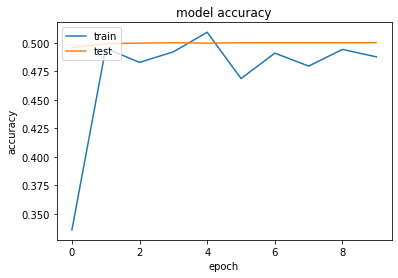

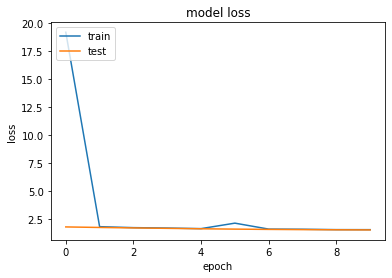

In [ ]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()